In [1]:
import os
# Find the latest version of spark 3.x  from https://downloads.apache.org/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.4'
spark_version = 'spark-3.5.4'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,321 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,705 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ReadParquet").getOrCreate()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Assuming the path to the Parquet file is correct and verified
file_path = '/content/drive/My Drive/TeamFiles/cleaned_data.parquet'

# Load the Parquet file into a Pandas DataFrame
df = pd.read_parquet(file_path)

# Show the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())


   FSA        DATE  HOUR CUSTOMER_TYPE PRICE_PLAN  TOTAL_CONSUMPTION  \
0  M1V  2024-07-01     1     SGS <50kW     Tiered             3125.6   
1  L7M  2024-07-01     1     SGS <50kW        TOU             1563.8   
2  L9W  2024-07-01     1   Residential     Tiered              925.0   
3  M2J  2024-07-01     1     SGS <50kW     Tiered              598.0   
4  K2C  2024-07-01     1   Residential        TOU             5095.2   

   PREMISE_COUNT  AVG_CONSUMPTION_PER_PREMISE  YEAR  MONTH  DAY  
0           1716                     1.821445  2024      7    1  
1            683                     2.289605  2024      7    1  
2           1232                     0.750812  2024      7    1  
3            267                     2.239700  2024      7    1  
4           7714                     0.660513  2024      7    1  


In [7]:
df.head()

,FSA,DATE,HOUR,CUSTOMER_TYPE,PRICE_PLAN,TOTAL_CONSUMPTION,PREMISE_COUNT,AVG_CONSUMPTION_PER_PREMISE,YEAR,MONTH,DAY
0,M1V,2024-07-01,1,SGS <50kW,Tiered,3125.6,1716,1.821445,2024,7,1
1,L7M,2024-07-01,1,SGS <50kW,TOU,1563.8,683,2.289605,2024,7,1
2,L9W,2024-07-01,1,Residential,Tiered,925.0,1232,0.750812,2024,7,1
3,M2J,2024-07-01,1,SGS <50kW,Tiered,598.0,267,2.239700,2024,7,1
4,K2C,2024-07-01,1,Residential,TOU,5095.2,7714,0.660513,2024,7,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180454 entries, 0 to 4180453
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FSA                          object 
 1   DATE                         object 
 2   HOUR                         int32  
 3   CUSTOMER_TYPE                object 
 4   PRICE_PLAN                   object 
 5   TOTAL_CONSUMPTION            float64
 6   PREMISE_COUNT                int32  
 7   AVG_CONSUMPTION_PER_PREMISE  float64
 8   YEAR                         int32  
 9   MONTH                        int32  
 10  DAY                          int32  
dtypes: float64(2), int32(5), object(4)
memory usage: 271.1+ MB
None


In [6]:
print(df.describe())

               HOUR  TOTAL_CONSUMPTION  PREMISE_COUNT  \
count  4.180454e+06       4.180454e+06   4.180454e+06   
mean   1.250997e+01       3.164949e+03   2.703736e+03   
std    6.918893e+00       6.487756e+03   5.538298e+03   
min    1.000000e+00       4.000000e-01   1.500000e+01   
25%    7.000000e+00       3.483000e+02   2.020000e+02   
50%    1.300000e+01       9.982000e+02   6.470000e+02   
75%    1.800000e+01       3.547000e+03   2.545000e+03   
max    2.400000e+01       3.287661e+05   1.440450e+05   

       AVG_CONSUMPTION_PER_PREMISE       YEAR         MONTH           DAY  
count                 4.180454e+06  4180454.0  4.180454e+06  4.180454e+06  
mean                  1.970409e+00     2024.0  7.345805e+00  1.566844e+01  
std                   1.709853e+00        0.0  2.846519e+00  8.758393e+00  
min                   2.075812e-03     2024.0  4.000000e+00  1.000000e+00  
25%                   8.160665e-01     2024.0  4.000000e+00  8.000000e+00  
50%                   1.293231

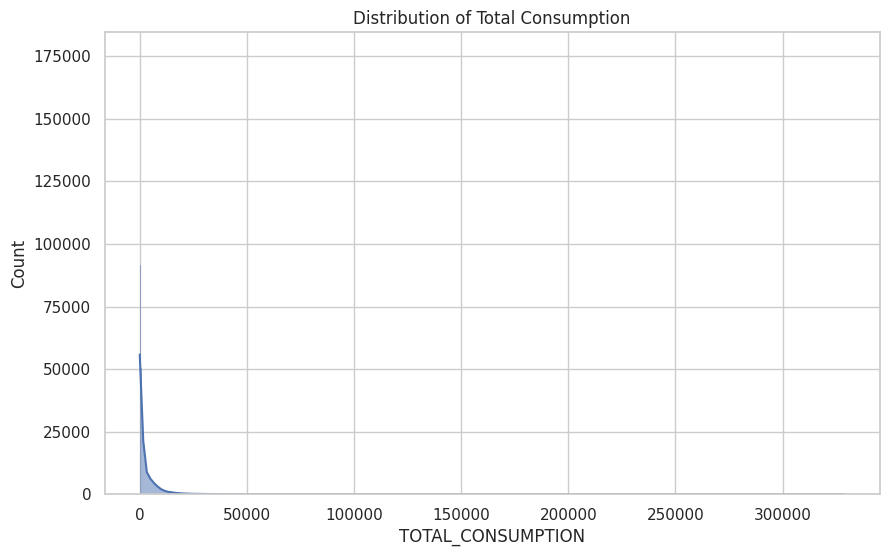

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting aesthetic parameters
sns.set(style="whitegrid")

# Visualizing the distribution of 'TOTAL_CONSUMPTION'
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_CONSUMPTION'], kde=True)
plt.title('Distribution of Total Consumption')
plt.show()


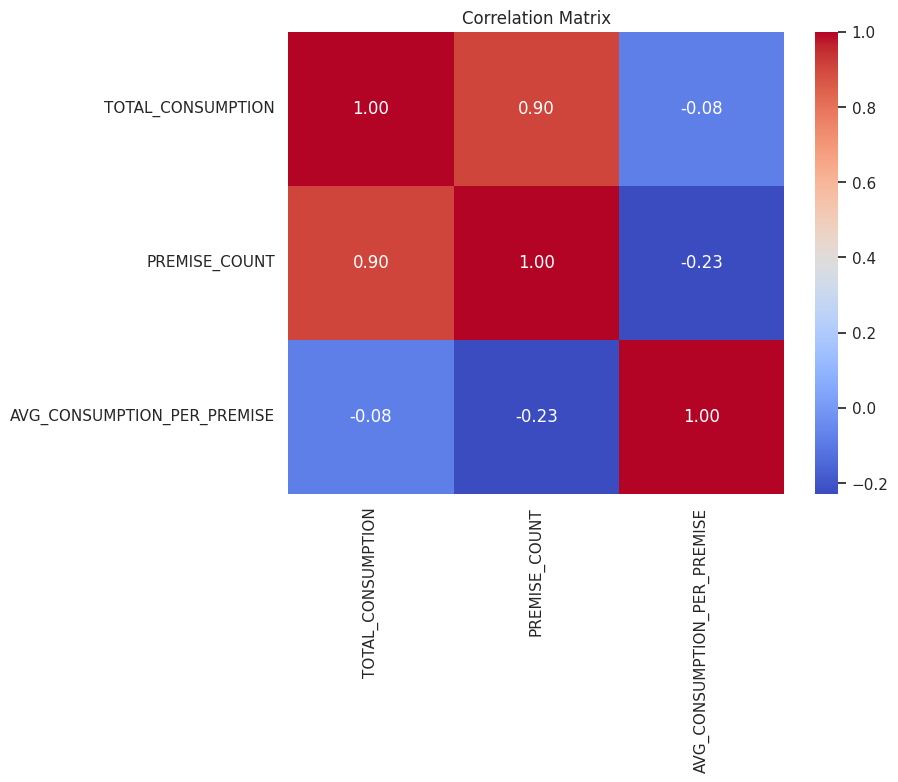

In [10]:
# Calculate correlation matrix
correlation_matrix = df[['TOTAL_CONSUMPTION', 'PREMISE_COUNT', 'AVG_CONSUMPTION_PER_PREMISE']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
